In [1]:
xml_file = "data/drugbank_partial.xml"

1) Utworzyć ramkę danych, która dla każdego leku zawiera następujące informacje: unikalny
identyfikator leku w bazie DrugBank, nazwę leku, jego typ, opis, postać w jakiej dany lek
występuje, wskazania, mechanizm działania oraz informacje z jakimi pokarmami dany lek
wchodzi w interakcje.

In [3]:
from DrugBankAnalyze.DrugSummary import drug_summary
display(drug_summary(xml_file).sample(5))

,DrugBank ID,Name,Type,Description,State,Indication,Mechanism of Action,Food Interactions
51,DB00054,Abciximab,biotech,Abciximab is a Fab fragment of the chimeric hu...,liquid,Abciximab is indicated as an adjunct to percut...,Abciximab binds to the intact platelet GPIIb/I...,{Avoid herbs and supplements with anticoagulan...
85,DB00092,Alefacept,biotech,Immunosuppressive dimeric fusion protein that ...,liquid,"As an immunosuppressive drug, Alefacept can be...",Inhibits T-lymphocyte activation and productio...,{}
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,{Avoid herbs and supplements with anticoagulan...
86,DB00093,Felypressin,biotech,"A synthetic nonapeptide comprising cysteinyl, ...",solid,For use as an alternative to adrenaline as a l...,Felypressin binds to the vasopressin receptor ...,{}
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,{}


2) Utworzyć ramkę danych pozwalającą na wyszukiwanie po DrugBank ID informacji o
wszystkich synonimach pod jakimi dany lek występuje. Napisać funkcję, która dla podanego
DrugBank ID utworzy i wyrysuje graf synonimów za pomocą biblioteki NetworkX. Należy
zadbać o czytelność generowanego rysunku.

{'Desulfatohirudin',
 'Hirudin variant-1',
 'Lepirudin',
 'Lepirudin recombinant',
 'R-hirudin',
 '[Leu1, Thr2]-63-desulfohirudin'}

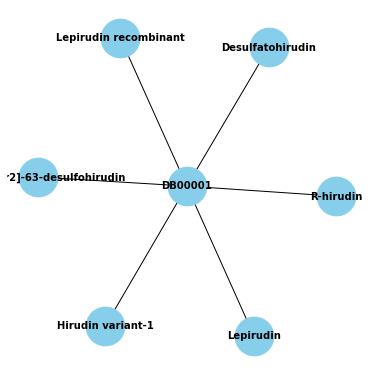

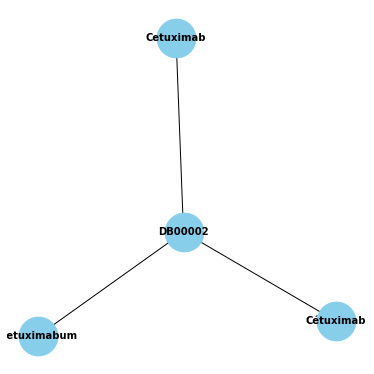

In [4]:
from DrugBankAnalyze.DrugSynonyms import get_synonyms, visualize_synonyms

display(get_synonyms(xml_file, "DB00001"))
visualize_synonyms(xml_file, "DB00001")
visualize_synonyms(xml_file, "DB00002")

3) Utworzyć ramkę danych o produktach farmaceutycznych zawierających dany lek
(substancję leczniczą). Ramka powinna zawierać informacje o ID leku, nazwie produktu,
producencie, kod w narodowym rejestrze USA (ang. *National Drug Code*), postać w jakiej
produkt występuje, sposób aplikacji, informacje o dawce, kraju i agencji rejestrującej
produkt.

In [ ]:
from DrugBankAnalyze.ProductSummary import product_summary
product_summary(xml_file, "DB00001")

,Product name,Labeller,NDC,Form,Strength,Route,Country,Source
0,Refludan,Bayer,50419-150,Powder,50 mg/1mL,Intravenous,US,FDA NDC
1,Refludan,Bayer,None,"Powder, for solution",50 mg / vial,Intravenous,Canada,DPD
2,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",50 mg,Intravenous,EU,EMA
3,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",20 mg,Intravenous,EU,EMA


4) Utworzyć ramkę danych zawierającą informacje o wszystkich szlakach wszystkich
rodzajów, tj. sygnałowych, metabolicznych, itd., z jakimi jakikolwiek lek wchodzi w interakcje.
Podać całkowitą liczbę tych szlaków.

In [ ]:
from DrugBankAnalyze.Pathways import get_pathways
display(get_pathways(xml_file))
print(f"Total number of pathways: {get_pathways(xml_file).shape[0]}")

,drugs
"blood coagulation, intrinsic pathway","{DB00006, DB00102, DB00025, DB00055, DB00001, ..."
cell surface receptor signaling pathway,"{DB00028, DB00004, DB00011, DB00017, DB00055, ..."
positive regulation of phospholipase C-activating G-protein coupled receptor signaling pathway,"{DB00055, DB00006, DB00001, DB00100}"
epidermal growth factor receptor signaling pathway,"{DB00039, DB00002, DB00004, DB00070, DB00098, ..."
Fc-epsilon receptor signaling pathway,"{DB00039, DB00002, DB00043, DB00004, DB00098, ..."
...,...
platelet-derived growth factor receptor-beta signaling pathway,{DB00102}
positive regulation of cell proliferation by VEGF-activated platelet derived growth factor receptor signaling pathway,{DB00102}
positive regulation of metanephric mesenchymal cell migration by platelet-derived growth factor receptor-beta signaling pathway,{DB00102}
platelet-derived growth factor receptor-alpha signaling pathway,{DB00102}


Total number of pathways: 95


5) Dla każdego szlaku sygnałowego/metabolicznego w bazie danych podać leki, które
wchodzą z nim w interakcje. Wyniki należy przedstawić w postaci ramki danych jak i w
opracowanej przez siebie formie graficznej. Przykładem takiej grafiki może być graf
dwudzielny, gdzie dwa rodzaje wierzchołków to szlaki sygnałowe i leki, a poszczególne
krawędzie reprezentują interakcję danego leku z danym szlakiem sygnałowym. Należy
zadbać o czytelność i atrakcyjność prezentacji graficznej.

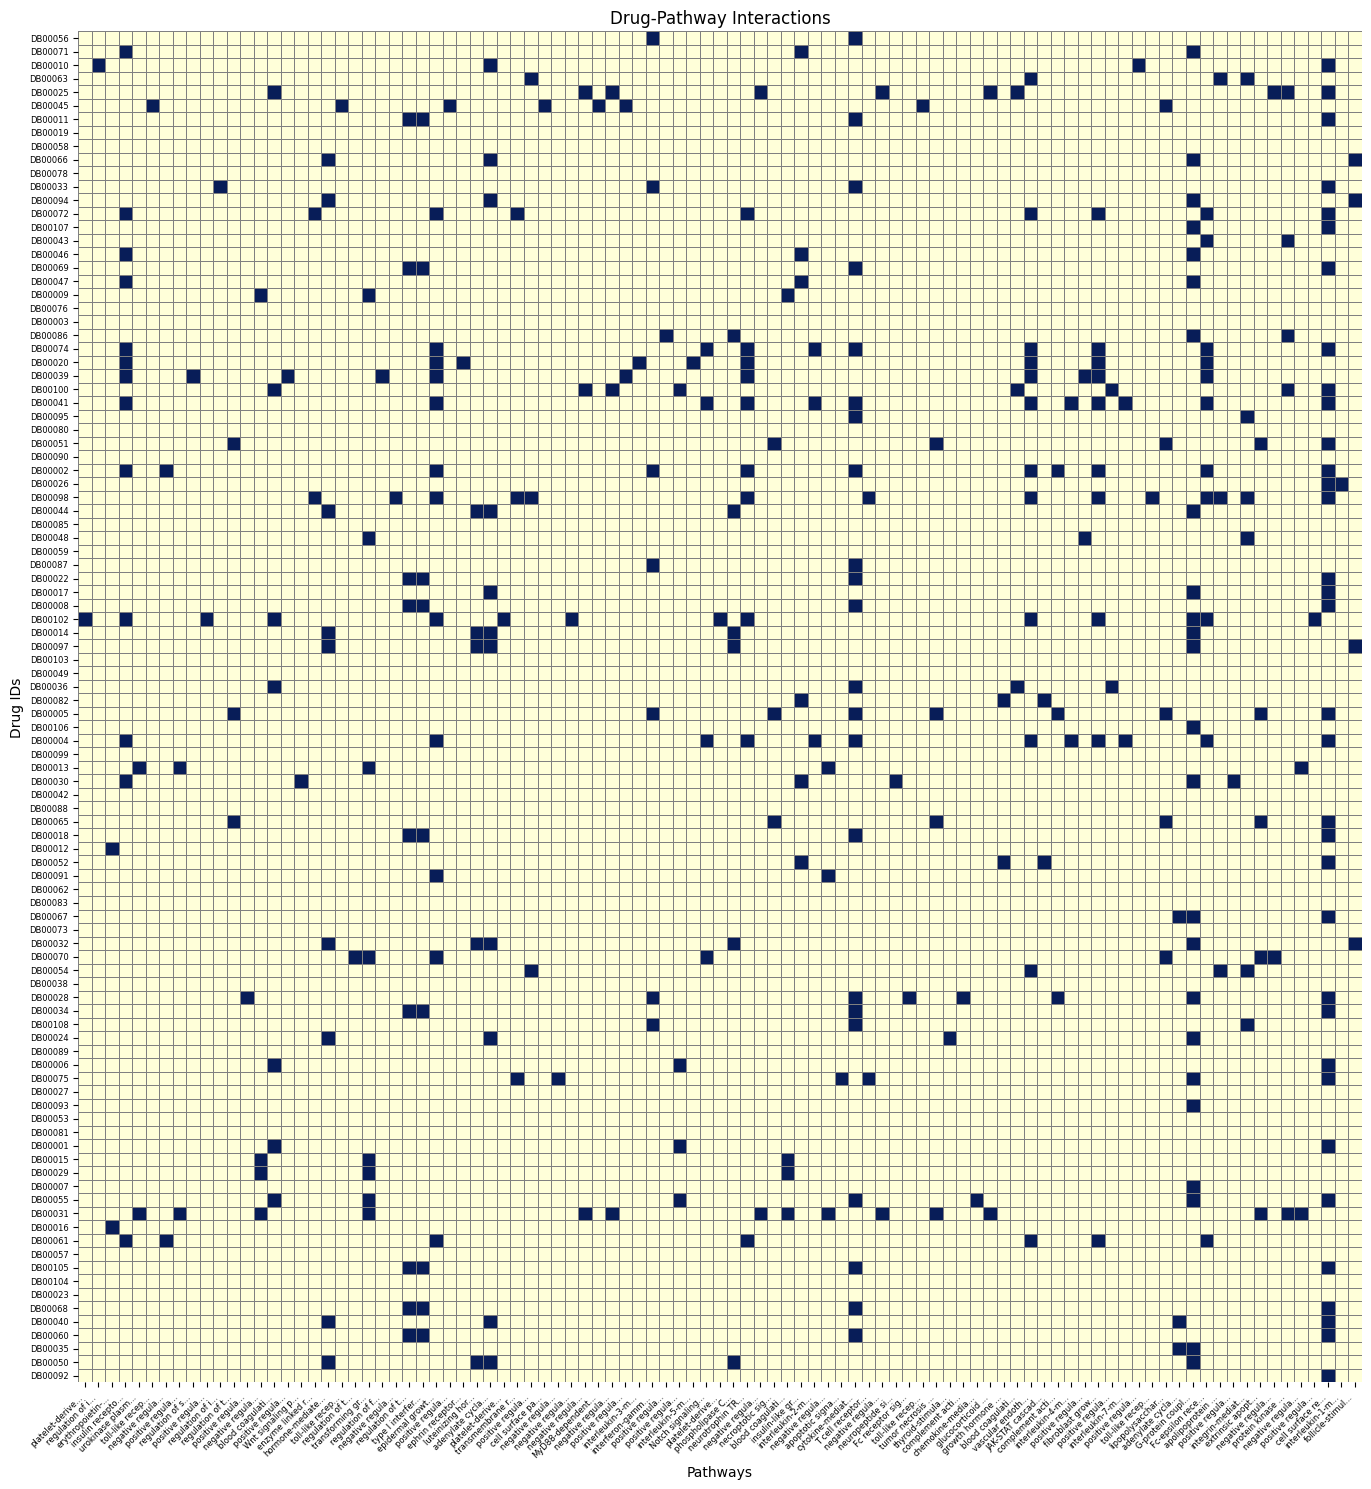

In [ ]:
from DrugBankAnalyze.Pathways import visualise_drug_pathway_interactions
visualise_drug_pathway_interactions(xml_file)

6) Dla każdego leku w bazie danych podać liczbę szlaków, z którymi dany lek wchodzi w
interakcje. Przedstawić wyniki w postaci histogramu z odpowiednio opisanymi osiami.

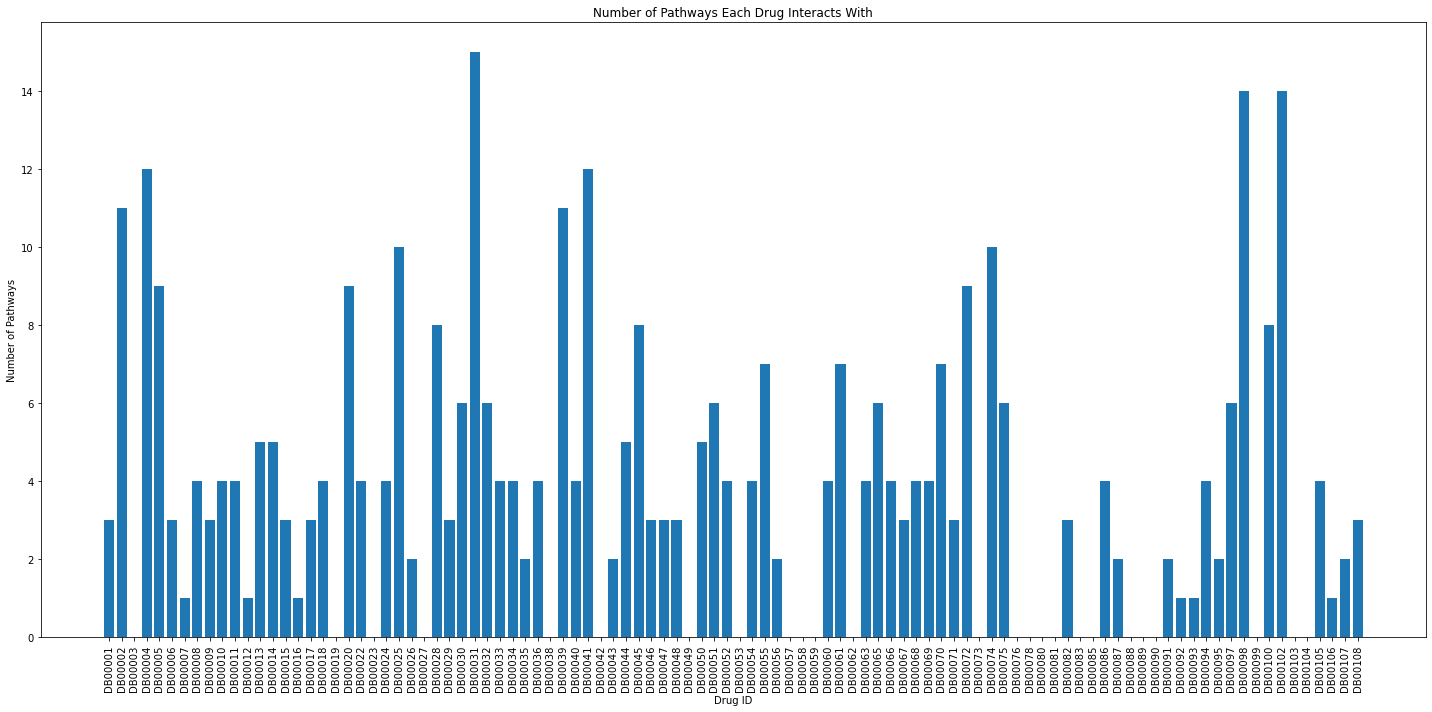

In [6]:
from DrugBankAnalyze.Pathways import number_of_pathways_histogram
number_of_pathways_histogram(xml_file)

7) Utworzyć ramkę danych zawierającą informacje o białkach, z którymi poszczególne leki
wchodzą w interakcje. Białka te to tzw. targety. Ramka danych powinna zawierać
przynajmniej DrugBank ID targetu, informację o zewnętrznej bazie danych (ang. *source*,
np. Swiss-Prot), identyfikator w zewnętrznej bazie danych, nazwę polipeptydu, nazwę genu
kodującego polipeptyd, identyfikator genu GenAtlas ID, numer chromosomu, umiejscowienie
w komórce.

In [ ]:
from DrugBankAnalyze.Targets import get_targets
display(get_targets(xml_file))

,DrugBank ID,Source,External ID,Name,Gene Name,GenAtlas ID,Chromosome,Cell Location
0,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...
135,BE0000205,Swiss-Prot,P09619,Platelet-derived growth factor receptor beta,PDGFRB,PDGFRB,5,Cell membrane
136,BE0000852,Swiss-Prot,P16234,Platelet-derived growth factor receptor alpha,PDGFRA,PDGFRA,4,Cell membrane
137,BE0000910,Swiss-Prot,P01023,Alpha-2-macroglobulin,A2M,A2M,12,Secreted
138,BE0000590,Swiss-Prot,P13612,Integrin alpha-4,ITGA4,ITGA4,2,Membrane


8) Utworzyć wykres kołowy prezentujący procentowe występowanie targetów w różnych
częściach komórki.

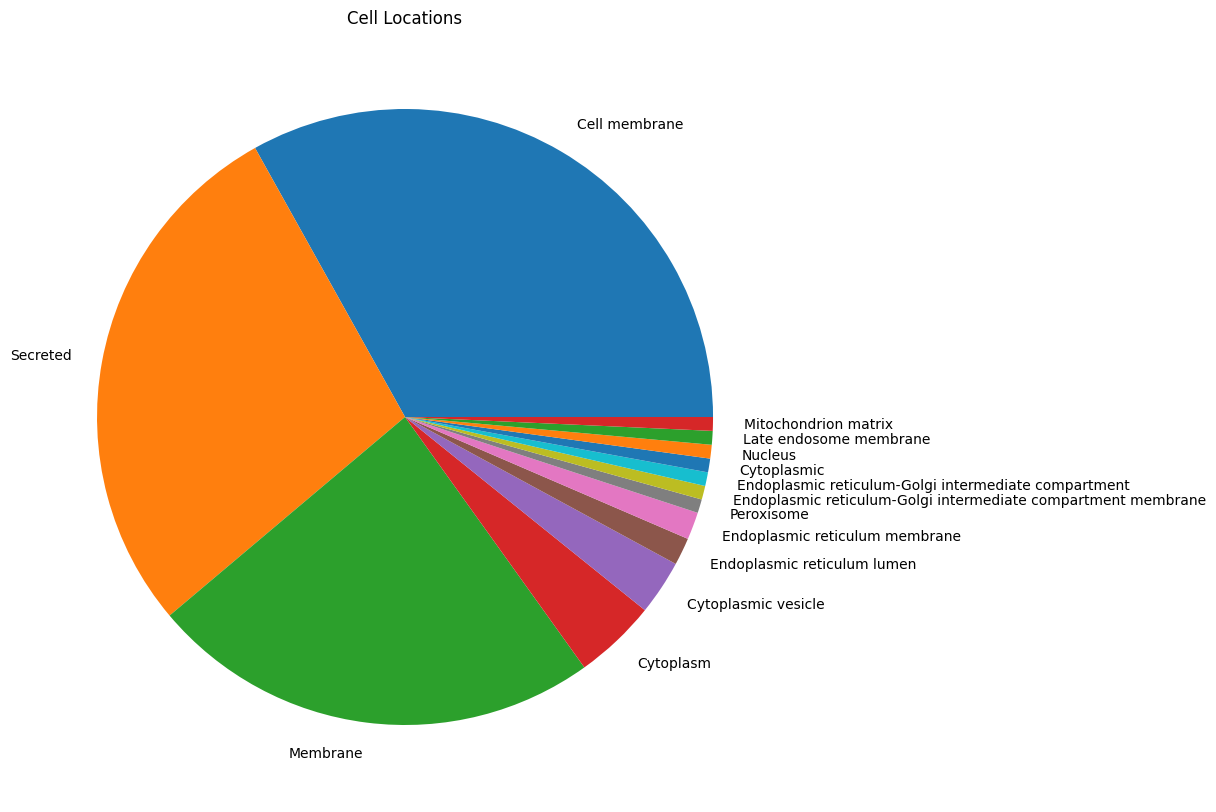

In [ ]:
from DrugBankAnalyze.Targets import target_cell_location_pie_chart
target_cell_location_pie_chart(get_targets(xml_file))

9) Utworzyć ramkę danych, pokazującą ile leków zostało zatwierdzonych, wycofanych, ile
jest w fazie eksperymentalnej (ang. *experimental* lub *investigational*) i dopuszczonych w
leczeniu zwierząt. Przedstawić te dane na wykresie kołowym. Podać liczbę zatwierdzonych
leków, które nie zostały wycofane.

,id,approved,withdrawn,experimental,vet_approved
0,DB00001,True,True,False,False
1,DB00002,True,False,False,False
2,DB00003,True,False,False,False
3,DB00004,True,False,True,False
4,DB00005,True,False,True,False
...,...,...,...,...,...
95,DB00104,True,False,True,False
96,DB00105,True,False,False,False
97,DB00106,True,True,True,False
98,DB00107,True,False,False,True


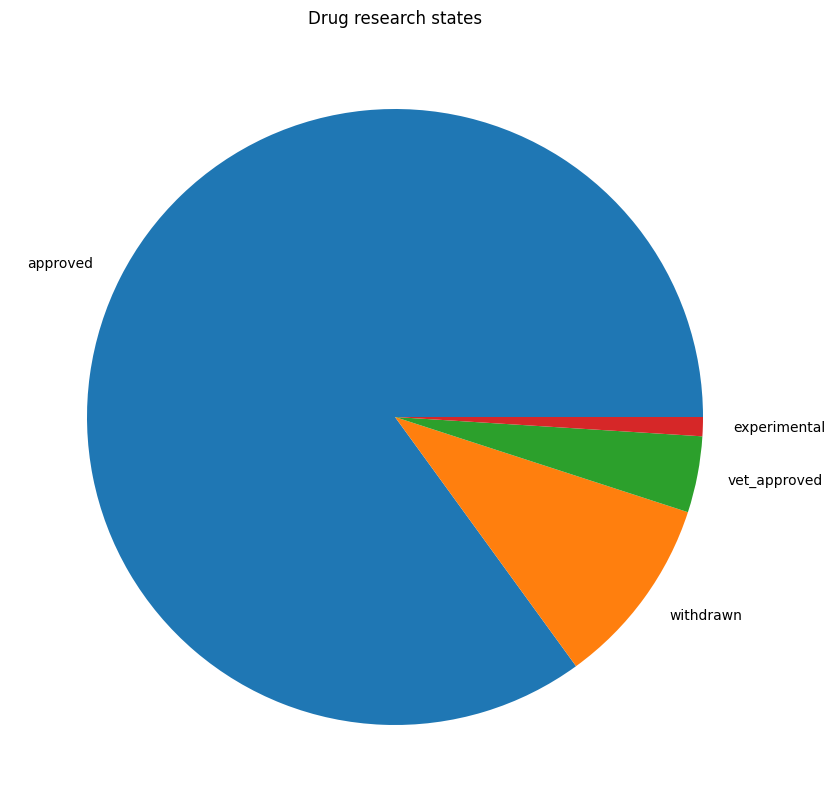

In [ ]:
from DrugBankAnalyze.ResearchStates import get_research_states, research_state_pie_chart
display(get_research_states(xml_file))
research_state_pie_chart(xml_file)


10) Utworzyć ramkę danych zawierającą informacje dotyczące potencjalnych interakcji
danego leku z innymi lekami.

In [7]:
from DrugBankAnalyze.DrugInteractions import get_drug_interactions
display(get_drug_interactions(xml_file, "DB00001"))

,id,name,description
0,DB06605,Apixaban,Apixaban may increase the anticoagulant activi...
1,DB06695,Dabigatran etexilate,Dabigatran etexilate may increase the anticoag...
2,DB01254,Dasatinib,The risk or severity of bleeding and hemorrhag...
3,DB01609,Deferasirox,The risk or severity of gastrointestinal bleed...
4,DB01586,Ursodeoxycholic acid,The risk or severity of bleeding and bruising ...
...,...,...,...
647,DB09422,Soybean oil,The therapeutic efficacy of Lepirudin can be d...
648,DB09567,Olive oil,The therapeutic efficacy of Lepirudin can be d...
649,DB15434,Mosunetuzumab,The risk or severity of bleeding can be increa...
650,DB17472,Pirtobrutinib,The risk or severity of bleeding can be increa...


11) Opracować według własnego pomysłu graficzną prezentację zawierającą informacje o
konkretnym genie lub genach, substancjach leczniczych, które z tym genem/genami
wchodzą w interakcje, oraz produktach farmaceutycznych, które zawierają daną substancję
leczniczą. Wybór dotyczący tego, czy prezentacja graficzna jest realizowana dla
konkretnego genu, czy wszystkich genów jednocześnie pozostawiamy Państwa decyzji.
Przy dokonywaniu wyboru należy kierować się czytelnością i atrakcyjnością prezentacji
graficznej.

,drug_id,drug_name,products
0,DB00001,Lepirudin,{Refludan}
1,DB00006,Bivalirudin,"{Bivalirudin in 0.9% Sodium Chloride, Angiomax..."
2,DB00055,Drotrecogin alfa,"{Xigris (5mg/vial), Xigris, Xigris (20mg/vial)}"
3,DB00100,Coagulation Factor IX (Recombinant),"{BeneFIX, Rebinyn, Benefix, Benefix - (500iu),..."


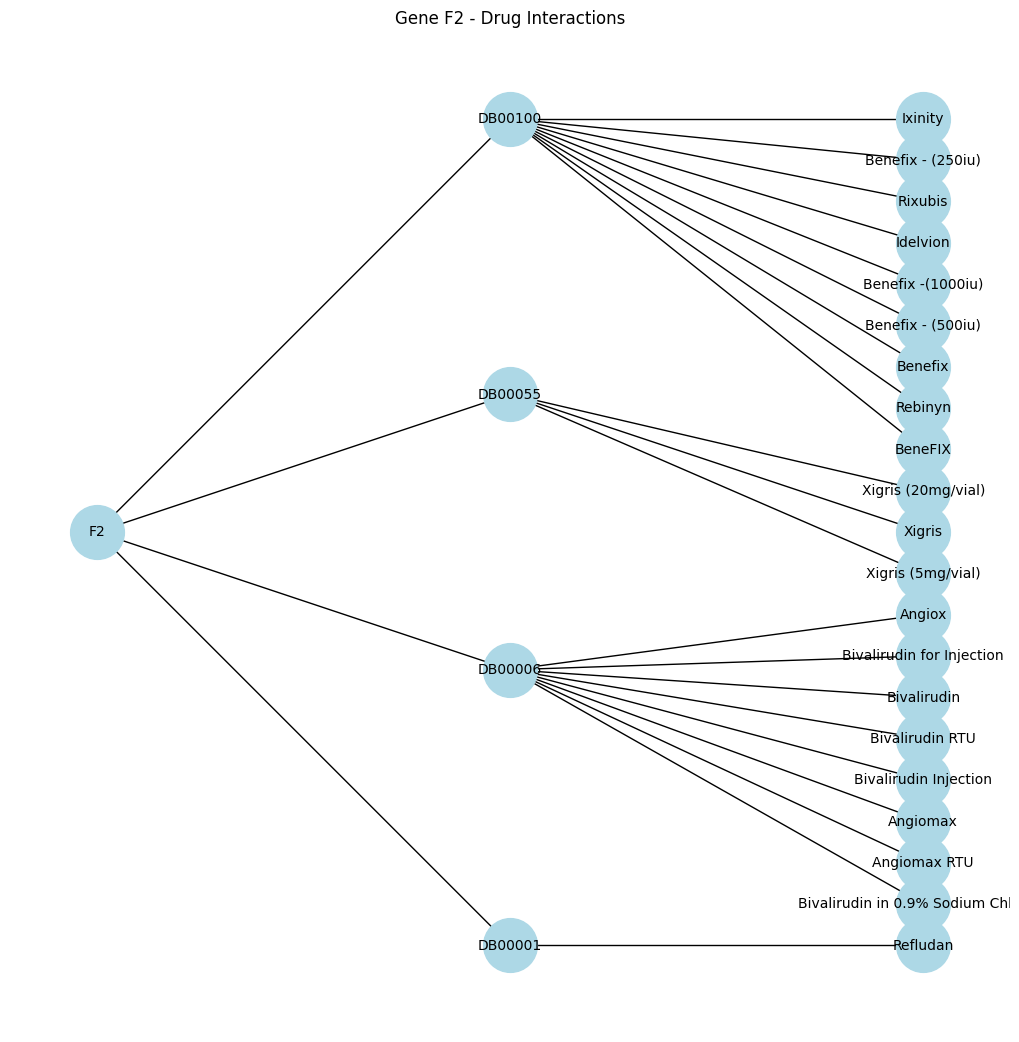

In [ ]:
from DrugBankAnalyze.GeneInteractions import get_gene_drug_interactions, gene_drug_interaction_graph
display(get_gene_drug_interactions(xml_file, "F2"))
gene_drug_interaction_graph(xml_file, "F2")

12) Zaproponować własną analizę i prezentację danych dotyczących leków. Można w tym
celu pozyskiwać dodatkowe informacje z innych biomedycznych i bioinformatycznych baz
danych dostępnych online. Należy jednak upewnić się, czy dana baza danych pozwala na
zautomatyzowane pobieranie danych przez program. Na przykład baza danych GeneCards
wprost tego zabrania, co zostało na czerwono podkreślone na tej stronie. Przykładowe bazy
danych to: UniProt (https://www.uniprot.org/), Small Molecule Pathway Database
(https://smpdb.ca/), The Human Protein Atlas (https://www.proteinatlas.org/).

,DrugBank ID,Name,State,Average price per serving
0,DB00001,Lepirudin,solid,273.190000
2,DB00003,Dornase alfa,liquid,4.094000
4,DB00005,Etanercept,liquid,369.555000
5,DB00006,Bivalirudin,solid,780.000000
6,DB00007,Leuprolide,solid,1726.200000
...,...,...,...,...
90,DB00098,Antithymocyte immunoglobulin (rabbit),liquid,636.480000
91,DB00099,Filgrastim,liquid,286.040000
92,DB00100,Coagulation Factor IX (Recombinant),liquid,1.134286
94,DB00103,Agalsidase beta,liquid,3087.600000


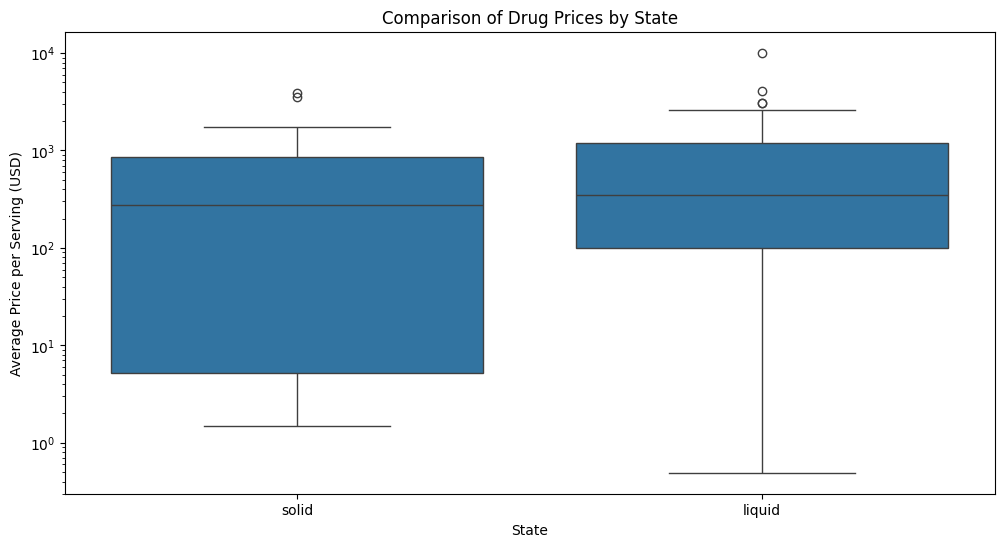

In [ ]:
from DrugBankAnalyze.Prices import get_prices, plot_prices
display(get_prices(xml_file))
plot_prices(xml_file)